In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'a1': [0.5, 0.7, 0.2, 1.2, 1.3, 1.1],
    'a2': [0.6, 0.8, 0.3, 1.1, 1.4, 1.0],
    'a3': [0.4, 0.6, 0.1, 1.0, 1.2, 1.0],
    'a4': [0.3, 0.5, 0.2, 1.3, 1.5, 1.2],
    'Condition': [0, 0, 0, 1, 1, 1]  # 0 = healthy, 1 = faulty
}


In [3]:
df = pd.DataFrame(data)

In [4]:
X = df.drop('Condition', axis=1)  # Features: sensor readings
y = df['Condition']  # Target: condition (healthy or faulty)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test_scaled)

In [9]:
print("Classification Report:\n", classification_report(y_test, y_pred))  # Detailed performance metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Show confusion matrix


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Confusion Matrix:
 [[1 1]
 [0 0]]


C:\Users\singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

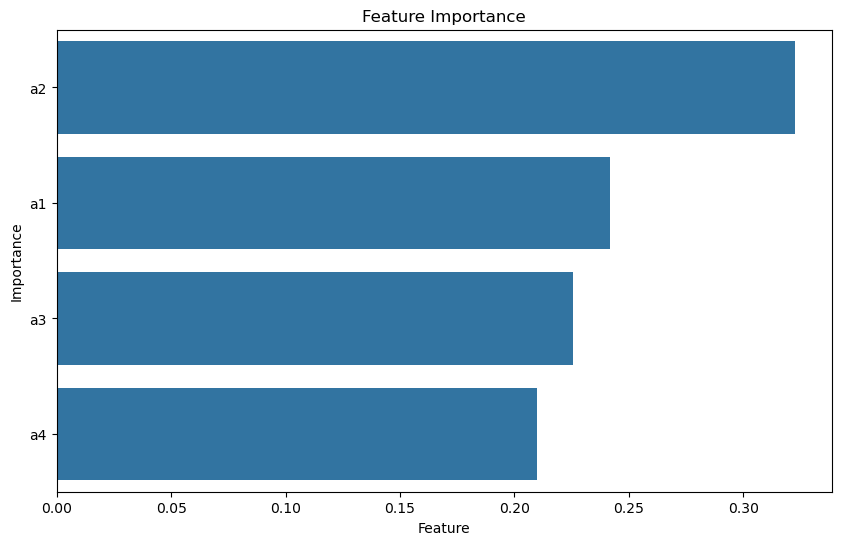

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()